<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/Models/MP_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ethereum Fraud Detection using LightGBM

[lightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/index.html)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path= '/content/gdrive/MyDrive/Cost Sensitive Approach for Ethereum Transactions Fraud Detection using Machine Learning/increased_transaction_dataset.csv'
dft= pd.read_csv(path)
dft.sample(5)

,Unnamed: 0,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
6017,6017,Non - Fraud,0.00,4628.170000,226780.22,0,49,1,8.917944,3.008913,0.000000,0.000000,147.436757,3.477845e+00,0.000000,0.00000,0.0,2.0,185,119
9205,9205,Non - Fraud,1.93,34554.290000,103668.65,3,3,0,5.000000,2.666485,2.665972,7.997917,0.001537,0.000000e+00,0.000000,0.00000,0.0,0.0,4,3
3060,3060,Non - Fraud,32.78,0.000000,65.57,2,1,0,101.000000,101.000000,50.499475,100.998950,0.001050,0.000000e+00,0.000000,0.00000,0.0,0.0,4,3
12590,12590,Fraud,107.17,533.405909,0.00,1,62,0,46.621648,0.000000,1.810004,2482.209535,1180.131377,7.504427e+06,835602.769405,7.47324,0.0,2.0,-1,1
9040,9040,Non - Fraud,24302.23,7762.170000,444186.57,17,4,0,47.004000,20.203280,3.496471,59.440000,21.373120,9.615062e+04,78089.451740,0.00000,4.0,20.0,71,111


In [ ]:
dft['FLAG']= dft['FLAG'].replace('Fraud', 1)
dft['FLAG']= dft['FLAG'].replace('Non - Fraud', 0)

dft['FLAG'].value_counts()

0    15299
1     4383
Name: FLAG, dtype: int64

In [ ]:
X= dft.drop(['FLAG', 'Unnamed: 0'], axis= 1)
y= dft[['FLAG']]

In [ ]:
%pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

**LightGBM without Cost Sensitive Learning**

In [ ]:
import lightgbm as lgb
from sklearn.metrics import classification_report

lg1 = lgb.LGBMClassifier()
lg1.fit(x_train, y_train)
y_pred1= lg1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4559
           1       0.99      0.96      0.97      1346

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.98      5905
weighted avg       0.99      0.99      0.99      5905



In [ ]:
from sklearn import metrics
cm1= metrics.confusion_matrix(y_test, y_pred1)
cm1

array([[4542,   17],
       [  53, 1293]])

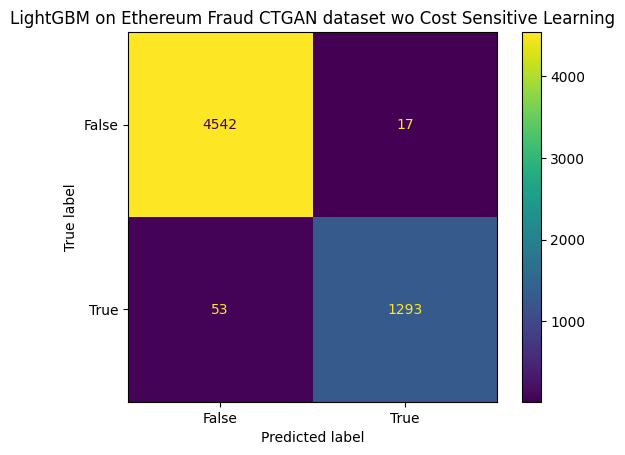

In [ ]:
display_cm1 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels= [False, True])

display_cm1.plot()
plt.title('LightGBM on Ethereum Fraud CTGAN dataset wo Cost Sensitive Learning')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score				
				
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred1)))				
print('LightGBM Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred1)))				
print('LightGBM Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred1)))				

LightGBM Model accuracy score: 0.9881
LightGBM Model precision score: 0.9870
LightGBM Model recall score: 0.9606


**LightGBM with Cost Sensitive Learning of 3**

In [ ]:
balancing_factor= y.value_counts()[0] // y.value_counts()[1] 
print(balancing_factor)

3


In [ ]:
lg2 = lgb.LGBMClassifier(scale_pos_weight= balancing_factor)
lg2.fit(x_train, y_train)
y_pred2= lg2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4559
           1       0.98      0.97      0.98      1346

    accuracy                           0.99      5905
   macro avg       0.99      0.98      0.99      5905
weighted avg       0.99      0.99      0.99      5905



In [ ]:
cm2= metrics.confusion_matrix(y_test, y_pred2)
cm2

array([[4538,   21],
       [  40, 1306]])

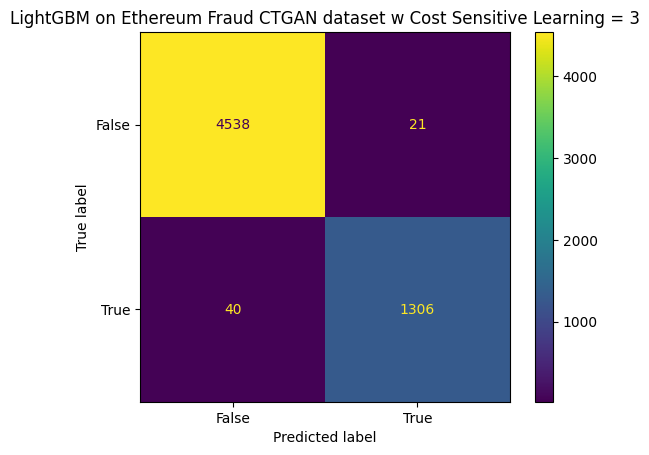

In [ ]:
display_cm2 = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels= [False, True])

display_cm2.plot()
plt.title('LightGBM on Ethereum Fraud CTGAN dataset w Cost Sensitive Learning = 3')

In [ ]:
print('Cost Sensitive LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred2)))						
print('Cost Sensitive LightGBM Model precision score: {0:0.4f}'.format(precision_score(y_test, y_pred2)))						
print('Cost Sensitive LightGBM Model recall score: {0:0.4f}'.format(recall_score(y_test, y_pred2)))						

Cost Sensitive LightGBM Model accuracy score: 0.9897
Cost Sensitive LightGBM Model precision score: 0.9842
Cost Sensitive LightGBM Model recall score: 0.9703


<hr>

In [ ]:
# # Splitting the Dataset
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

# # Calculating the balancing factor for Cost Sensitive Learning
# balancing_factor= y.value_counts()[0] // y.value_counts()[1]

# # Apply Cost Sensitive Learning to the model
# import lightgbm as lgb
# lg2 = lgb.LGBMClassifier(scale_pos_weight= balancing_factor)
# lg2.fit(x_train, y_train)
# y_pred2= lg2.predict(x_test)